## A/B TEST Project description:

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.

You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

In [1]:
! pip install -Uq pandas
! pip install -Uq seaborn
! pip install -Uq plotly
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
try:
    data = pd.read_csv('hypotheses_us.csv',sep=';')
    orders = pd.read_csv('orders_us.csv')
    visits = pd.read_csv('visits_us.csv')
except:
    data = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
data.head(15)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
data.columns = data.columns.str.lower()
data.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


### PreProcessing removing the users exist in both groups :

In [6]:
groupA = orders[orders.group == 'A'].visitorId.unique().tolist()
print('groupA - {}'.format(len(groupA)))


groupA - 503


In [7]:
groupB = orders[orders.group =='B'].visitorId.unique().tolist()
print('groupB - {}'.format(len(groupB)))


groupB - 586


In [8]:
double_group= [value for value in groupA if value in groupB]
print('users in both group - {}'.format(len(double_group)))

users in both group - 58


In [9]:
orders = orders[~orders.visitorId.isin(double_group)]
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [10]:
groupA = orders[orders.group == 'A'].visitorId.unique().tolist()
print('updaetd groupA - {}'.format(len(groupA)))

updaetd groupA - 445


In [11]:
groupB = orders[orders.group == 'B'].visitorId.unique().tolist()
print('updated groupB - {}'.format(len(groupB)))

updated groupB - 528


In [12]:
double_group_check = [ value for value in groupA if value in groupB]
print('users in both groups now - {}'.format(len(double_group_check)))

users in both groups now - 0


In [13]:
print('updated list of orders - {}'.format(orders.shape[0]))

updated list of orders - 1016


In [14]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


### Conclusion: 
Now we have users which is not repeating in the Group A and Group B.

## Part 1. Prioritizing Hypotheses:

### Apply the ICE framework to prioritize hypotheses

In [15]:
data['ice'] = (data['impact']* data['confidence']) / data['effort']
print(data[['hypothesis','ice']].sort_values(by='ice', ascending=False))

                                          hypothesis        ice
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### Apply the RICE framework to prioritize hypotheses:


In [16]:
data['rice'] = (data['reach']* data['impact']* data['confidence']) / data['effort']
print(data[['hypothesis','rice']].sort_values(by='rice', ascending=False))

                                          hypothesis   rice
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### prioritization of hypotheses ( RICE instead of ICE).

Ice has three components ( Impact + Confidence = Efforts)

Rice has four components. (One component more then ice which is reach)

Reach - how many users will be affected by the update

Impact - how strongly this update will affect the users.

Confidence - how sure you are the product will affect them.

_RICE + IMPACT + CONFIDENCE  = EFFORTS_


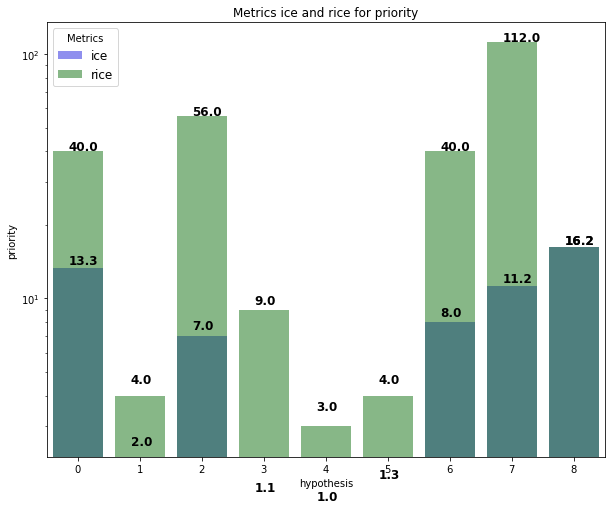

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x=data.index, y='ice', label='ice', color='blue', alpha=0.5,
              data=data, log=True)
for i, v in enumerate(data['ice']):
    plt.text(i-.15, v+.5, round(v,1), fontsize=12, color='black', fontweight='bold')
    
sns.barplot(x=data.index, y='rice', label='rice', color='green', alpha=0.5,
              data=data, log=True)
for i, v in enumerate(data['rice']):
    plt.text(i-.15, v+.5, round(v,1), fontsize=12, color='black', fontweight='bold')
    
plt.legend(prop={'size': 12}, title = 'Metrics')
plt.ylabel('priority')
plt.xlabel('hypothesis')
plt.title('Metrics ice and rice for priority')
plt.show()

#### Conclusion:

1. as per the above ice and rice comparison its clear that rice has higher impact.
2. as we can see that from '0' to '8' hypothesis we can see that 0 , 2 , 6 ,7,8 has high impact.

## Part 2. A/B Test Analysis:

### _1.Graph cumulative revenue by group. Make conclusions and conjectures._

In [18]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [19]:
visitorgrp = orders.groupby('group').agg({'visitorId':'nunique', 'revenue':'sum'})
visitorgrp

,visitorId,revenue
group,,
A,445,53212.0
B,528,79651.2


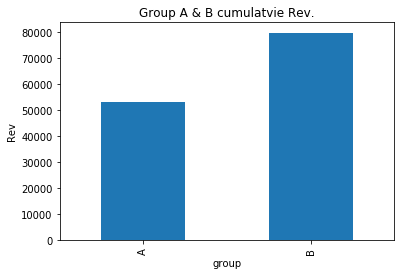

In [20]:
ABgrp = orders.groupby('group')['revenue'].agg(sum)
ABgrp.plot(kind='bar', title='Group A & B cumulatvie Rev.', ylabel='Rev');

In [21]:
dateGroup = orders[['date','group']].drop_duplicates()

In [22]:
orderAggregate = dateGroup.apply(lambda x: orders[np.logical_and(orders['date'] <=x['date'] ,orders['group'] ==x['group'])].agg({'date':'max' , 'group':'max', 'transactionId' :pd.Series.nunique, 'visitorId':pd.Series.nunique, 'revenue': 'sum'}), axis=1,).sort_values(by=['date','group'])
visitorAggregate = dateGroup.apply(lambda x: visits[np.logical_and(visits['date'] <=x['date'] ,visits['group'] ==x['group'])].agg({'date':'max' , 'group':'max', 'visits':'sum'}), axis=1,).sort_values(by=['date','group'])

In [23]:
orderAggregate.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [24]:
visitorAggregate.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [25]:
cumulativeData = orderAggregate.merge(visitorAggregate, left_on=['date', 'group'], right_on=['date', 'group'])
# cumulativeData.columns = ['date', 'group', 'orders', 'visitors', 'revenue']
cumulativeData = cumulativeData.rename(columns= {'date':'date', 'group':'group', 'transactionId':'orders', 'visitorId':'visitors', 'revenue':'revenue'})


print(cumulativeData.head(5))

         date group  orders  visitors  revenue  visits
0  2019-08-01     A      23        19   2266.6     719
1  2019-08-01     B      17        17    967.2     713
2  2019-08-02     A      42        36   3734.9    1338
3  2019-08-02     B      40        39   3535.3    1294
4  2019-08-03     A      66        60   5550.1    1845


In [26]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


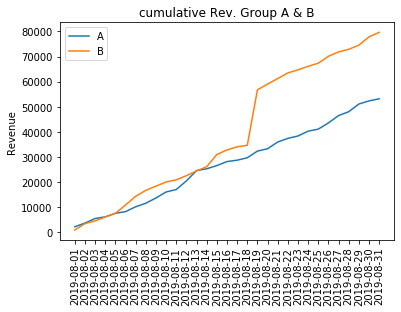

In [27]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xticks(rotation=90)
plt.ylabel('Revenue')
plt.title('cumulative Rev. Group A & B')
plt.show()

#### Conclusion : from the above graph it shows that group B has higher visits and revenue.

## Graph cumulative average order size by group:


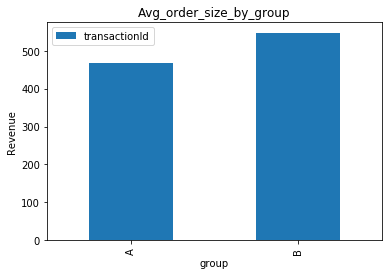

In [28]:
Avg_order_group = orders.groupby('group').agg({'transactionId': 'count'})
Avg_order_group.plot(kind='bar', title='Avg_order_size_by_group', ylabel='Revenue');

Text(0.5, 1.0, 'Cumulative Avg. Orders Size Group A & B')

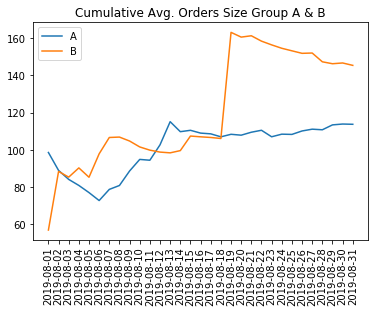

In [29]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title('Cumulative Avg. Orders Size Group A & B')

### Conclusion :

1. From the above graph it is obvious that group B has more average orders then group A.

### Graph the relative difference in cumulative average order size for group B compared with group A:

In [30]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


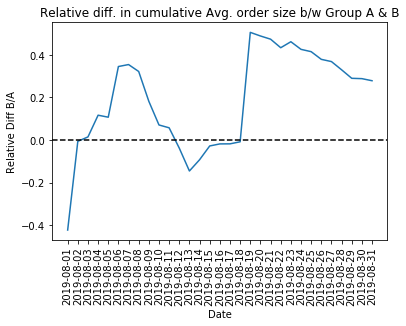

In [31]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Relative Diff B/A')
plt.title('Relative diff. in cumulative Avg. order size b/w Group A & B');

### Conclusion:

we can see that group B relative difference shows approximately 20% growth in Avg. ordre sizes with group A.

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day, with Graph and Conclusion:

In [32]:
orderAggregate.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [33]:
visitorAggregate.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [36]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visits']
cumulativeData.head()

,date,group,orders,visitors,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [38]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']


/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


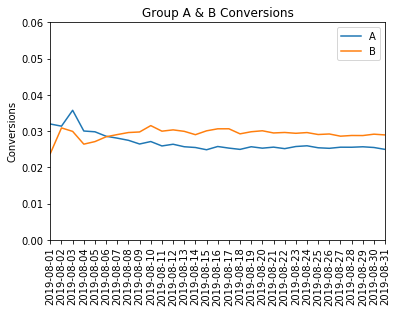

In [39]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Group A & B Conversions')
plt.ylabel('Conversions')
plt.xticks(rotation=90)
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', -0, 0.06]);

### Conclusion:

Conversion for group A slightly decline and then stabilizing on the other group B convesion start incline and then stabilize too.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text xticklabel objects>)

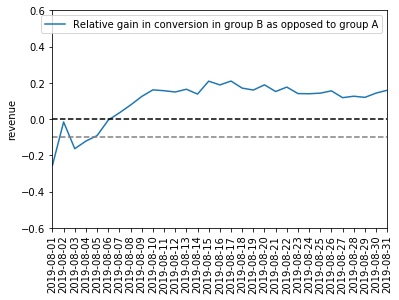

In [41]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]) 
plt.ylabel('revenue')
plt.xticks(rotation=90)

In [42]:
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


### Conclusion:

At the begining the group B was legging behind but then grwoing gradually.

## Plot a scatter chart of the number of orders per user. Make conclusions:

In [43]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [44]:
ordersbyusers = (orders.drop (['group', 'revenue', 'date'], axis=1)
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique}))
                  

In [45]:
ordersbyusers.columns = ['visitorId','transactionId']

In [46]:
print(ordersbyusers.sort_values(by='transactionId', ascending=False).head(10))

      visitorId  transactionId
908  3967698036              3
55    249864742              3
478  2108163459              3
687  2988190573              3
890  3908431265              3
138   611059232              3
632  2742574263              3
157   678354126              2
323  1404560065              2
452  1985475298              2


In [47]:
x_values = pd.Series(range(0, len(ordersbyusers['transactionId'])))


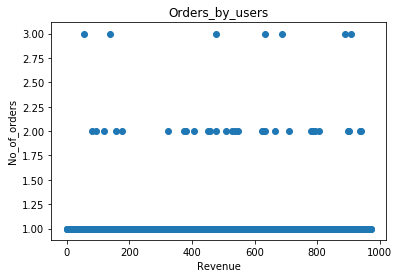

In [48]:
plt.scatter(x_values, ordersbyusers['transactionId'])
plt.ylabel('No_of_orders')
plt.xlabel('Revenue')
plt.title('Orders_by_users');

### Conclusion :

it shows that we have a lot of users with two to four orders exactly share we do not know, we will see the percentile.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly: 

In [49]:
print(np.percentile(ordersbyusers['transactionId'], [95,99]))

[1. 2.]


### Conclusion: 

No more then 5% of users place more then 2 orders, and 10% of users more then 1 orders, it would be resonabe to set limit 2 to 3 orders per users and filter anomalies on that basis.

## Plot a scatter chart of order prices. Make conclusions: 

In [50]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [51]:
ordersbyusersId = orders.drop(['group' , 'revenue' , 'date'], axis=1)\
.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersbyusersId.columns = ['userId', 'orders']

print(ordersbyusersId.sort_values(by='orders',ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


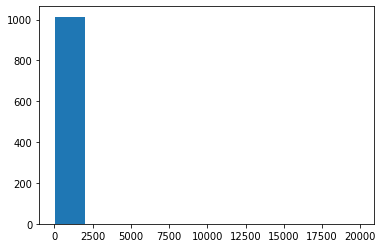

In [52]:
plt.hist(orders['revenue']);

Text(0.5, 1.0, 'order_prices')

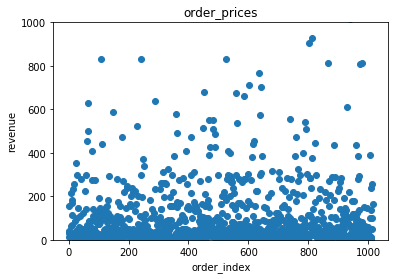

In [53]:
order_price = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(order_price, orders['revenue']);
(plt.ylim(0, 1000))
plt.ylabel('revenue')
plt.xlabel('order_index')
plt.title('order_prices')

### Conclusion :

There are users with 2,3 orders That's more than a regular user would place in a week.

The majority of customers placed only one order. However, a significant share placed two to three orders.

## Calculate the 95th and 99th percentiles of order prices:

In [54]:
# print(np.percentile(ordersbyusersId['orders'],[95,99]))

In [55]:
print(np.percentile(orders['revenue'],[95,99]))

[414.275 830.3  ]


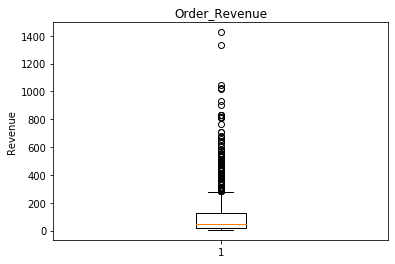

In [56]:
# plt.boxplot(orderId_scatter, ordersbyusers['transactionId'])
# plt.title('Orders_by_users');

plt.boxplot(orders[orders['revenue'] < 2500]['revenue'])
plt.title('Order_Revenue')
plt.ylabel('Revenue')
plt.show()

### Conclusion:


No more than 5% of orders cost more than $414.2,  

And no more than 1% cost more than $830.3.

There are a lot of users with two to three orders.

## Find the statistical significance of the difference in conversion between the groups using the raw data:

In [57]:
  orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [58]:
orderbyusersA = ( orders[orders['group'] =='A']\
                 .groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
orderbyusersA.columns = ['visitorId','orders']

orderbyusersB = ( orders[orders['group'] =='B']\
                 .groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
orderbyusersB.columns = ['visitorId','orders']

In [59]:
sampleA = pd.concat([orderbyusersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orderbyusersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([orderbyusersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orderbyusersB['orders'])), name='orders')],axis=0)

In [60]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.006


In [61]:
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean()-1))

0.160


In [62]:
#Reviewer's code
from scipy import stats as st
import random
import scipy

scipy.__version__

'1.4.1'

### Testing Hypothesis:

**Null hypothesis H₀ The difference in conversion between the groups A and B is not statistically significant.**

**Alternative hypothesis H₁ The difference in conversion between the groups A and B is statistically significant.**

**Alpha I choose 5% , critical statistical significance level.**

In [63]:
groupA_rev =  cumulativeDataA['revenue']
groupA_mean = cumulativeDataA['conversion'].mean()
print("{:0.3f}".format(groupA_mean))

0.027


In [64]:
groupB_rev =  cumulativeDataB['revenue']
groupB_mean = cumulativeDataB['conversion'].mean()
print('{0:.3f}'.format(groupB_mean))

0.029


### Conclusion:

Here we can see that the group A conversion mean is not equal to gorup B conversion mean, its mean reject the Null hypothesis now we have to measure their significance level.

In [65]:
sample_set = random.randint(30, len(groupA_rev))
print('Size of Random Sample = ', sample_set)

sample_set_A = cumulativeDataA['revenue'].sample(sample_set)
sample_set_B = cumulativeDataB['revenue'].sample(sample_set)


alpha = 0.05 # level of significance

Size of Random Sample =  30


### With Equal Variance = True

In [66]:
results = st.ttest_ind(
        sample_set_A, 
        sample_set_B,
        equal_var=True)


print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  0.01681242444123124
We reject the null hypothesis


### With Equal Variance = False

In [67]:
results = st.ttest_ind(sample_set_A, sample_set_B , equal_var = False)

print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print('we reject the null hypothesis')
else:
    print('we can not reject the null hypothesis')

p-value 0.017465290790689245
we reject the null hypothesis


### Conclusion:

Here we can see that p_value is less then 5% so we reject the null hypothesis and accept the alternative hypothesis. Its mean the difference between the conversion group are statistically significant.

### Conclusion:

Based on the raw data, there is a difference between groups A and B.

That there's  a statistically significant difference in conversion between the groups. But the relative loss of group B is 16.0% (the second row of the output)



### Find the statistical significance of the difference in average order size between the groups using the raw data:

In [68]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [69]:
# print('{0:.3f}'.format( stats.mannwhitneyu(orders[orders['group']=='A']['revenue']\
#                                            ,orders[orders['group']=='B']['revenue']), alternative='two-sided')[1])
print('{0:.3f}'.format( stats.mannwhitneyu(orders[orders['group']=='A']['revenue']\
                                           ,orders[orders['group']=='B']['revenue'],alternative='two-sided')[1]))

0.862


In [70]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.278


### Conclusion: 

The p-value is greater than 0.05, so there's no reason to reject the null hypothesis.

### Find the statistical significance of the difference in conversion between the groups using the filtered data:

In [71]:
userswithmanyorders = pd.concat([orderbyusersA[orderbyusersA['orders'] > 2 ]['visitorId'],orderbyusersB[orderbyusersB['orders'] > 2]['visitorId']], axis=0)
userswithmanyorders

58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
33      249864742
347    2742574263
Name: visitorId, dtype: int64

In [72]:
userwithexpesiveorders = orders[orders['revenue'] > 5000]['visitorId']
abnormalUsers = pd.concat([userswithmanyorders, userwithexpesiveorders], axis=0).drop_duplicates().sort_values()

In [73]:
print(abnormalUsers.shape)

(8,)


In [74]:
sampleAfilter = pd.concat([orderbyusersA[np.logical_not(orderbyusersA['visitorId'].isin(abnormalUsers))]['orders']\
                           , pd.Series(0, index=np.arange(visits[visits['group'] =='A']['visits']\
                                                          .sum() - len(orderbyusersA['orders'])),name='orders')],axis=0)

In [75]:
sampleBfilter = pd.concat([orderbyusersB[np.logical_not(orderbyusersB['visitorId'].isin(abnormalUsers))]['orders']\
                           ,pd.Series(0, index=np.arange(visits[visits['group'] =='B']['visits']\
                                                         .sum() - len(orderbyusersB['orders'])), name='orders')], axis=0)

**_Apply the statistical Mann-Whitney criterion to the resulting samples:_**

In [76]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAfilter, sampleBfilter)[1]))

0.004


In [77]:
print('{0:.3f}'. format(sampleBfilter.mean()/ sampleAfilter.mean() -1))

0.183


### Conclusion: 

The results for the conversion almost did not change.we can see the relative difference in the Avg.order sizes of the groups.

### Find the statistical significance of the difference in average order size between the groups using the filtered data :

In [78]:
print('{0:.3f}'.format(stats.mannwhitneyu
                       (orders[np.logical_and
                               (orders['group'] =='A',
                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                        orders[np.logical_and(orders['group'] =='B',
                                              np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

0.355


In [79]:
print('{0:.3f}'.format(orders[np.logical_and(orders['group'] =='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group'] =='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() -1))

-0.042


### Conclusion :
The p-value increased, but now the difference between the segments is 4% instead of 27%.

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test: 

### Final Conclusion: ( Part 1)

1. Raw data and filter data revealed statistically significant difference in conversion between the groups.

2. Filter data  showing statistically significant difference in Average order size between the groups.

3. The graph shows that the difference between the group tell us group B results gradually improving then stabilizing.

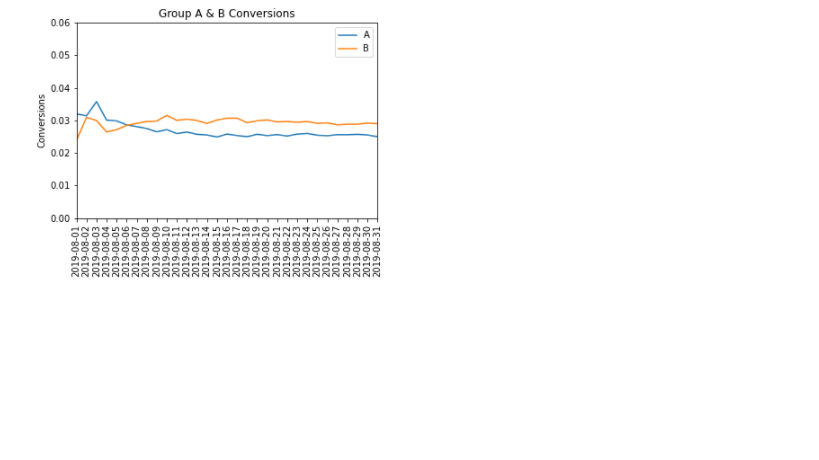

### (Part 2)

The below graph showing the difference in conversion between the groups tells us that group B's results are seem to be improving.

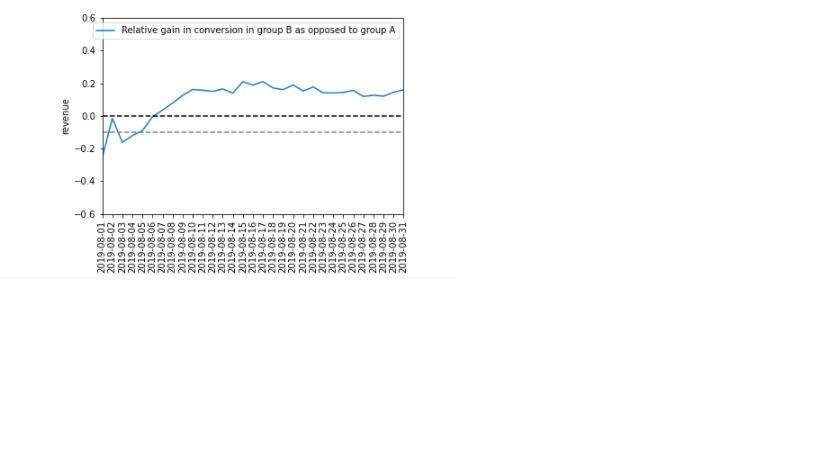

### ( Part 3) 


The below graph showing an evidence in average order size between the groups tells us that group B's results are gradually increasing then slightly decline and stabilize:

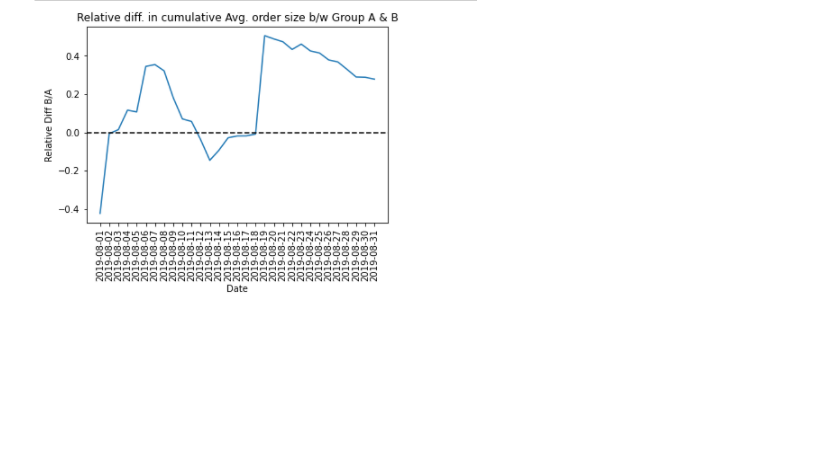


### ( Part 3) 


**Based on these facts, we can conclude that the test is successful and should be stopped. since the probability that segment B will turn out to be better than segment A is almost successfull.**